## Homework I: Frederik Chettouh

I have created a new notebook for easier readibility and to write where possible code from scratch with help from the Udacity "Intro to Deeplearning with Pytorch" course and class material.

## Part I: Setup

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
from torch import nn
from torch import optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt



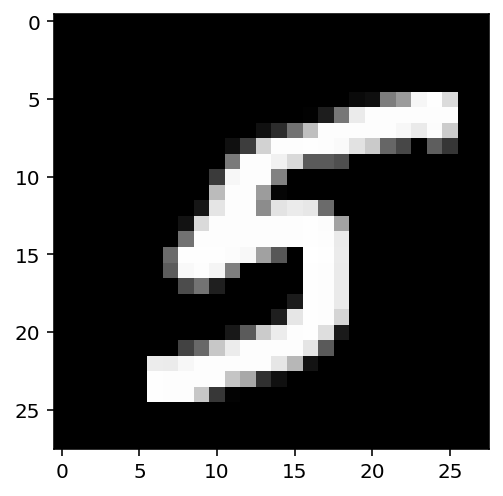

In [2]:
#getting the data
torch.manual_seed(0)

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))]
                              )
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
# checking out one batch
dataiter = iter(trainloader)
images,labels = dataiter.next()
# squeeze reshapes the nupy array 
plt.imshow(images[0].numpy().squeeze(),cmap='Greys_r')

## Part II: Single layer Multiclass Neural Network

Next two classes are defined, the first is the network, the second is an extension that trains and validates the network automatically and produces the output. There is no seperate test and validation set since this is part of the second homework.

In [4]:
images.shape[-1]**2

784

In [5]:
# setting the shape of the vector
input_shape = images.shape[-1]**2
hidden_shape_1 = 128
hidden_shape_2 = 64
output_shape = 10

In [8]:

class Single_LR(nn.Module):
    def __init__(self,dimx, labels):
        
        super().__init__()
        
        self.fc1 = nn.Linear(dimx, labels)
        self.logsoftmax = nn.LogSoftmax(dim=1)
        
    def forward(self,x):
        print(x.shape)
        x = x.view(x.shape[0],-1)
        print(x.shape)
        x = self.fc1(x)
        x = self.logsoftmax(x)
        return x


In [9]:
class Single_LR_extended(Single_LR):
    
    def __init__(self,dimx,nlabels,epochs=5,lr=0.001):
        
        super().__init__(dimx,nlabels)  
        
        self.lr = lr 
        
        self.optim = optim.Adam(self.parameters(), self.lr)
        
        self.epochs = epochs
        
        self.criterion = nn.NLLLoss()               
        
        self.loss_during_training = []
        self.validate_loss = []
        self.accuracy = []
        
    def validate(self,testloader):
        self.eval()
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images,labels in testloader:
              log_proba = self.forward(images)
              loss = self.criterion(log_proba, labels)
              test_loss += loss

              proba = torch.exp(log_proba)
              top_p, top_c = proba.topk(1, dim=1)
              equals = top_c ==labels.view(*top_c.shape)
              accuracy +=torch.mean(equals.type(torch.FloatTensor))    
            else:
              self.validate_loss.append(test_loss/len(testloader))
              self.accuracy.append(accuracy/len(testloader))
                    
              print("Validation loss: {}" .format(self.validate_loss[-1]))
              print("Accuracy in val set : {}" .format(self.accuracy[-1]))
                    
        
    def train_loop(self,trainloader,testloader = None):
      self.train()
      for e in range(int(self.epochs)):
            
        running_loss = 0.
            
        for images, labels in trainloader:            
          self.optim.zero_grad()

          out = self.forward(images)
                
          loss = self.criterion(out, labels)
          running_loss += loss.item()

          loss.backward()
          self.optim.step() 
                
        else:
          self.loss_during_training.append(running_loss/len(trainloader))
                
          print("Training loss after {} epochs: {}" .format(e+1,self.loss_during_training[-1]))
                
          if testloader:
            self.validate(testloader)
            self.train()


In [10]:
single_model = Single_LR_extended(input_shape,output_shape)

In [11]:
print(single_model)

Single_LR_extended(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
  (logsoftmax): LogSoftmax()
  (criterion): NLLLoss()
)


In [12]:
single_model.train_loop(trainloader, testloader)

torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])


torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])
torch.Size([64, 1, 28, 28])
torch.Size([64, 784])


KeyboardInterrupt: 

## Part III: Multiclass Multilayer perceptron

Next we create a multilayer multiclass peceptron and an extended class that trains and validates the model automatically.

In [0]:
class Multi_LR(nn.Module):
            
    def __init__(self,input_shape,hidden_shape_1,hidden_shape_2,output_shape):
        super().__init__()
        
        
        self.fc1 = nn.Linear(input_shape,hidden_shape_1)
        self.fc2 = nn.Linear(hidden_shape_1,hidden_shape_2)
        self.fc3 = nn.Linear(hidden_shape_2,output_shape)
        
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self,x):
        x = x.view(x.shape[0],-1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        output = self.softmax(x)
            
        return output

In [0]:

class Multi_LR_extended(Multi_LR):
    
    def __init__(self,input_shape,hidden_shape_1,hidden_shape_2,output_shape,epochs=100,lr=0.001):
        
        super().__init__(input_shape,hidden_shape_1,hidden_shape_2,output_shape)  
        self.lr = lr 
        
        self.optim = optim.Adam(self.parameters(), self.lr)

        self.epochs = epochs
        
        self.criterion = nn.NLLLoss()            
        
        self.loss_during_training = [] 
        self.validate_loss = []
        self.accuracy = []
        
        
    def validate(self,testloader):
        self.eval()
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for images,labels in testloader:
                log_proba = self.forward(images)
                loss = self.criterion(log_proba, labels)
                test_loss +=loss

                proba = torch.exp(log_proba)
                top_p, top_c = proba.topk(1, dim=1)
                equals = top_c ==labels.view(*top_c.shape)
                accuracy +=torch.mean(equals.type(torch.FloatTensor))
            else:
                self.validate_loss.append(test_loss/len(testloader))
                self.accuracy.append(accuracy/len(testloader))
                    
                print("Validation loss: {}" .format(self.validate_loss[-1]))
                print("Accuracy in val set : {}" .format(self.accuracy[-1]))
    def train_loop(self,trainloader,testloader = None):
        self.train()
        for e in range(int(self.epochs)):
            
            running_loss = 0.
            
            for images, labels in trainloader:            
                self.optim.zero_grad()
            
                out = self.forward(images)
                
                loss = self.criterion(out, labels)
                running_loss += loss.item()

                loss.backward()
                self.optim.step() 
                
            else:
                self.loss_during_training.append(running_loss/len(trainloader))
    
                
                print("Training loss after {} epochs: {}" 
                      .format(e+1,self.loss_during_training[-1]))
                
                if testloader:
                    self.validate(testloader)
                    self.train()


In [38]:
my_LR = Multi_LR_extended(input_shape,hidden_shape_1,hidden_shape_2,output_shape,epochs=50,lr=1e-3)

my_LR.train_loop(trainloader, testloader)


Training loss after 1 epochs: 0.4030217383700266
Validation loss: 0.22190171480178833
Accuracy in val set : 0.9343152642250061
Training loss after 2 epochs: 0.19687108712783183
Validation loss: 0.18923348188400269
Accuracy in val set : 0.9409832954406738
Training loss after 3 epochs: 0.14412035800016193
Validation loss: 0.12691812217235565
Accuracy in val set : 0.9607881903648376
Training loss after 4 epochs: 0.11825160501000564
Validation loss: 0.11191949993371964
Accuracy in val set : 0.9637739062309265
Training loss after 5 epochs: 0.09841096233889293
Validation loss: 0.10453886538743973
Accuracy in val set : 0.9657643437385559
Training loss after 6 epochs: 0.08837731935774912
Validation loss: 0.09444412589073181
Accuracy in val set : 0.9703423380851746
Training loss after 7 epochs: 0.07398902246830806
Validation loss: 0.10157252848148346
Accuracy in val set : 0.9692476391792297
Training loss after 8 epochs: 0.06838068429235199
Validation loss: 0.09292428195476532
Accuracy in val se

## Part IV: Saving the configurations

Last we will save and load the model parameters and show there is will be a size mismatch if not also the hyperparameters are matched. Then we will re train also save the hyperparamters and show that this way everything works fine.

In [0]:
torch.save(my_LR.state_dict(),'checkpoint.pth')
state_dict = torch.load('checkpoint.pth')


In [0]:
my_LR = Multi_LR_extended(500,hidden_shape_1,hidden_shape_2,output_shape,epochs=50,lr=1e-3)
my_LR.load_state_dict(state_dict)

RuntimeError: ignored

In [0]:
#retraining with only one epoch to get a model
my_LR = Multi_LR_extended(input_shape,hidden_shape_1,hidden_shape_2,output_shape,epochs=1,lr=1e-3)
my_LR.train(trainloader, testloader)


In [0]:
chekpoint = checkpoint = {
    'input_size':input_shape,
    'hidden_size_1':hidden_shape_1,
    'hidden_size_2':hidden_shape_2,
    'ouput_size':output_shape,
    'lr':1e-3,
    'epochs':50,
    'state_dict':my_LR.state_dict(),
}


In [0]:
torch.save(chekpoint,'checkpoint.pth')
state_dict = torch.load('checkpoint.pth')
my_LR = Multi_LR_extended(
    state_dict['input_size'],
    state_dict['hidden_size_1'],
    state_dict['hidden_size_2'],
    state_dict['ouput_size'],
    epochs=50,
    lr=1e-3)
my_LR.load_state_dict(state_dict['state_dict'])